<a href="https://colab.research.google.com/github/himanshu-kr-jha/birthday_wish/blob/main/Vehicle_Failure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [109]:
# Load the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Machine learning /automobile_failure_detection.csv')
dataset

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0


In [110]:
# Drop unnecessary columns
dataset = dataset.drop(['UDI', 'Product ID'], axis=1)

In [111]:
dataset.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object

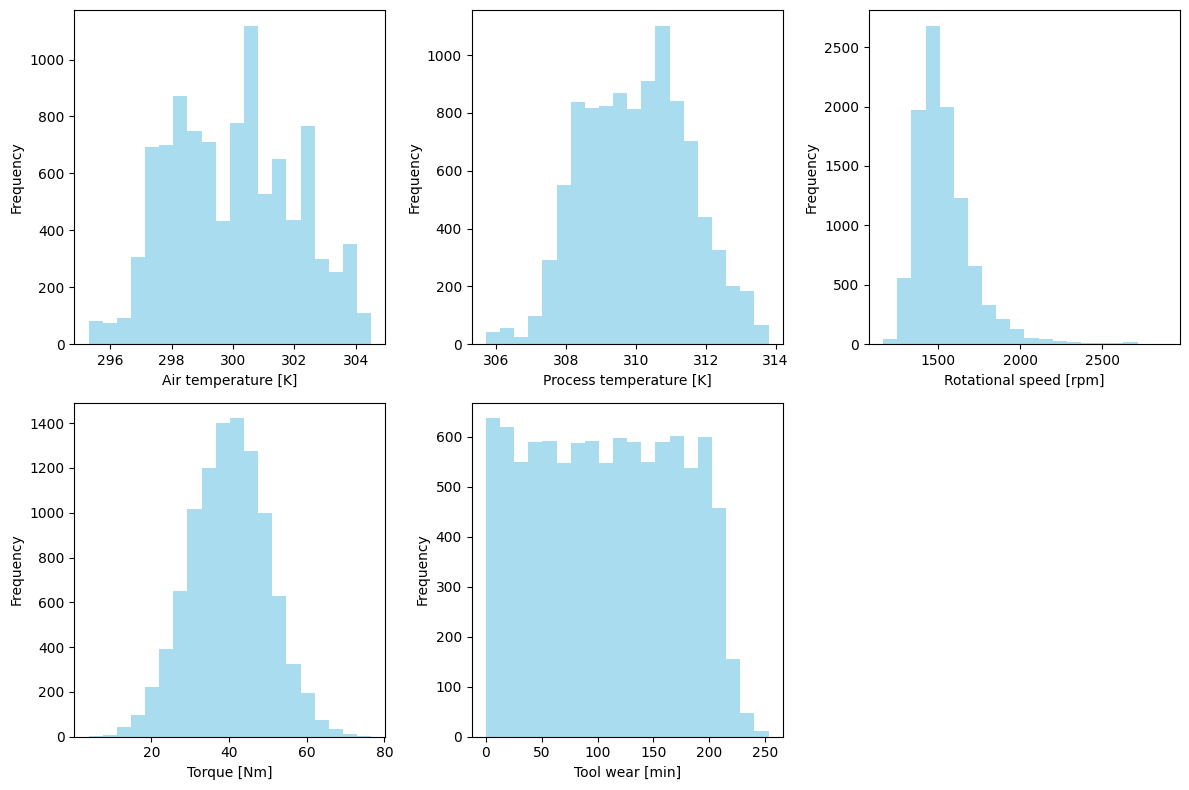

In [112]:
# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], start=1):
    plt.subplot(2, 3, i)
    plt.hist(dataset[feature], bins=20, color='skyblue', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


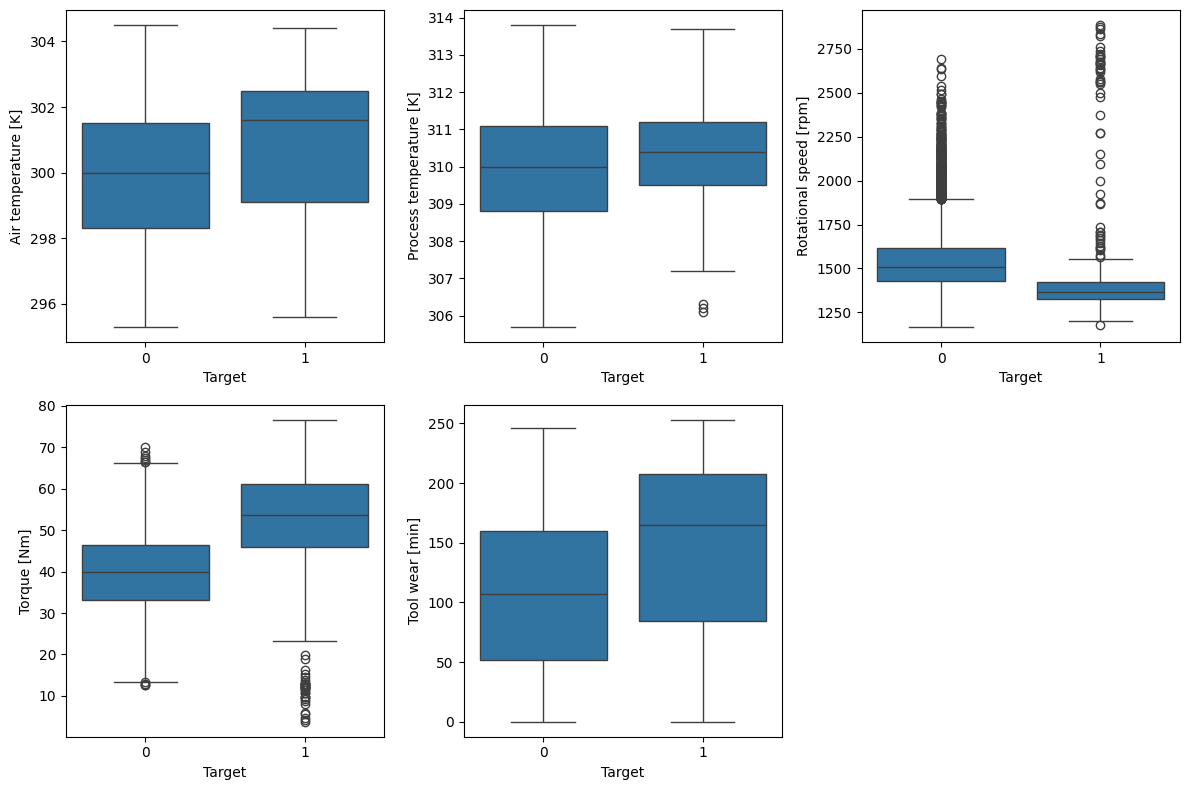

In [115]:
# Boxplots for numerical features by target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Target', y=feature, data=dataset)
    plt.xlabel('Target')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


In [ ]:

# Define the numerical features (excluding the target variable)
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Function to handle outliers using IQR method
def handle_outliers(data, features):
    for feature in features:
        # Calculate the IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define the boundaries for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with NaN
        data.loc[(data[feature] < lower_bound) | (data[feature] > upper_bound), feature] = np.nan

    return data

# Handle outliers
dataset = handle_outliers(dataset.copy(), numerical_features)

# Drop rows with NaN values (outliers)
dataset.dropna(inplace=True)

# Print the cleaned dataset
print("Cleaned Dataset:")
print(dataset_cleaned)


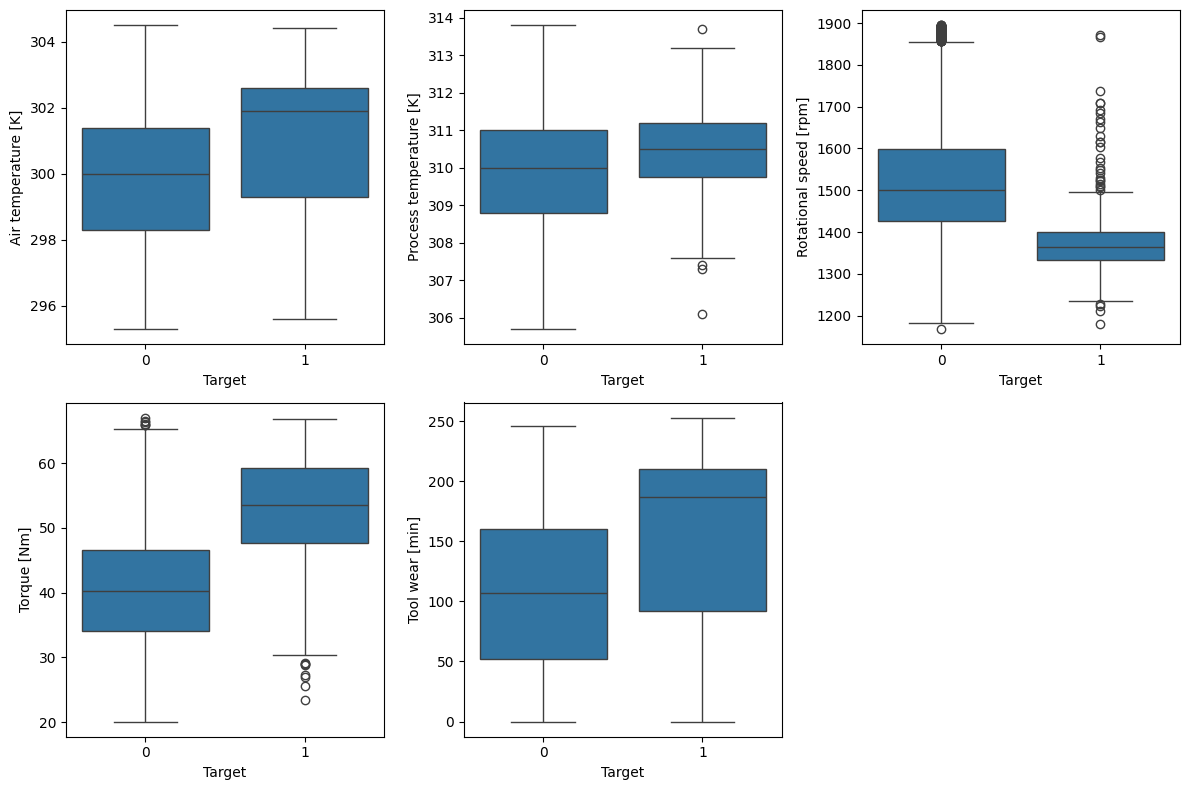

In [122]:
# Boxplots for numerical features by target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Target', y=feature, data=dataset_cleaned)
    plt.xlabel('Target')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [124]:
# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
for column in dataset.select_dtypes(include=['object']):
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [125]:
# Split dataset into features (X) and target variable (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [126]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [127]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [128]:
# Create an empty list to store accuracies
accuracy_data = []

# Train and evaluate each model
for name, model in models.items():
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Model Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy data
    accuracy_data.append({'Model': name, 'Accuracy': accuracy})

In [103]:
# Convert accuracy data to DataFrame
accuracy_table = pd.DataFrame(accuracy_data)

# Print accuracy table
accuracy_table

,Model,Accuracy
0,Logistic Regression,0.835605
1,K Nearest Neighbors,0.938244
2,Support Vector Classifier,0.837675
3,Random Forest,0.976195
4,Naive Bayes,0.846645
5,Decision Tree,0.958599


from matplotlib import pyplot as plt
accuracy_table['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
accuracy_table.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
accuracy_table['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(accuracy_table['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(accuracy_table, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

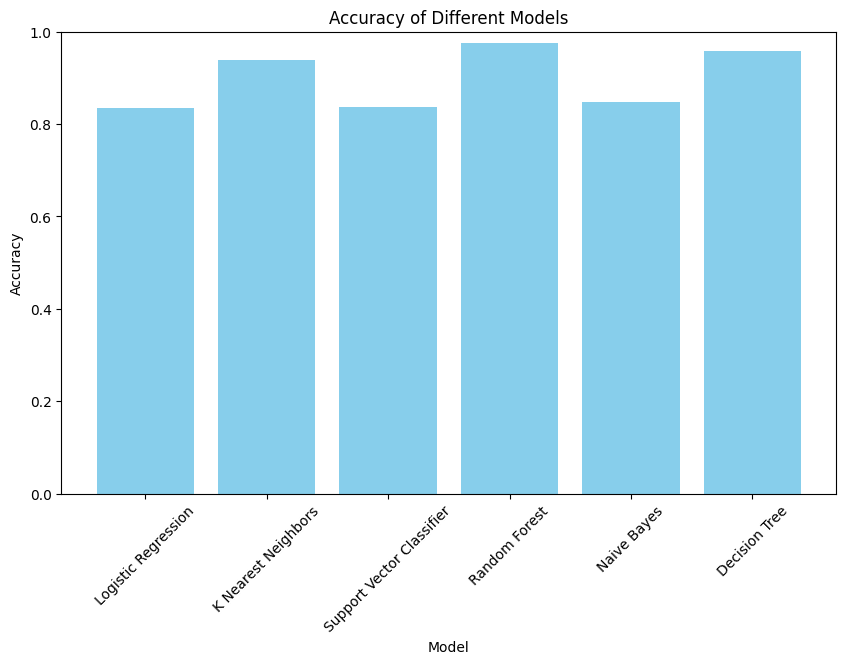

In [129]:
# Plot accuracy chart
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['Model'], accuracy_table['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
